## This Notebook Will Be Used For The Coursera IBM Applied Data Science Capstone Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


## Background /Problem

#### Every time we get behind the wheel, we are inherently incur some risk while going from point A to point B. Sometimes conditions exist that dramatically increase that risk. This project aims to discover whether or not certain conditions significantly increase the severity of an accident so we can take precautions and avoid serious injury.


## Data

#### Using the Seattle PD Collisions dataset, I will use various machine learning models to identify correlations between certain road conditions and the severity of a collision. We will target the SEVERITYCODE and use ROADCOND, LIGHTCOND, and WEATHER as independent variables.

In [3]:
# Load Data
df = pd.read_csv("~/Desktop/ibm_datascience/9_capstone/data/Data-Collisions.csv")
df.head()

/home/ereshki/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
print(df.shape)
print(df.info())

(194673, 38)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 1

In [5]:
# Sort Data
df = df[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND']]
df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight


In [6]:
# Converting dtypes to strings
df['WEATHER'] = df['WEATHER'].astype('category')
df['ROADCOND'] = df['ROADCOND'].astype('category')
df['LIGHTCOND'] = df['LIGHTCOND'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   SEVERITYCODE  194673 non-null  int64   
 1   WEATHER       189592 non-null  category
 2   ROADCOND      189661 non-null  category
 3   LIGHTCOND     189503 non-null  category
dtypes: category(3), int64(1)
memory usage: 2.0 MB


In [7]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df['WEATHER_CAT'] = df['WEATHER'].cat.codes 
df['ROADCOND_CAT'] = df['ROADCOND'].cat.codes 
df['LIGHTCOND_CAT'] = df['LIGHTCOND'].cat.codes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   SEVERITYCODE   194673 non-null  int64   
 1   WEATHER        189592 non-null  category
 2   ROADCOND       189661 non-null  category
 3   LIGHTCOND      189503 non-null  category
 4   WEATHER_CAT    194673 non-null  int8    
 5   ROADCOND_CAT   194673 non-null  int8    
 6   LIGHTCOND_CAT  194673 non-null  int8    
dtypes: category(3), int64(1), int8(3)
memory usage: 2.6 MB


In [8]:
df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
0,2,Overcast,Wet,Daylight,4,8,5
1,1,Raining,Wet,Dark - Street Lights On,6,8,2
2,1,Overcast,Dry,Daylight,4,0,5
3,1,Clear,Dry,Daylight,1,0,5
4,2,Raining,Wet,Daylight,6,8,5


In [9]:
# Balance target value SEVERITYCODE
df.SEVERITYCODE.value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [10]:
# Downsampling using resample
from sklearn.utils import resample

# Separate majority and minority classes
sc1 = df[df.SEVERITYCODE == 1]
sc2 = df[df.SEVERITYCODE == 2]

# Downsample majority labels equal to number of samples in minority
sc1 = sc1.sample(len(sc2), random_state = 0)

# Concat minority and majority dataframes
df_bal = pd.concat([sc1, sc2])

# Shuffle dataset to prevent bias
df_bal = df_bal.sample(frac = 1, random_state = 0)

df_bal.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [11]:
df_bal = df_bal.drop(['WEATHER','ROADCOND','LIGHTCOND'], axis=1)
df_bal.head()

,SEVERITYCODE,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
29959,2,1,0,5
110326,1,1,0,5
5970,2,1,0,2
130027,1,10,7,8
76480,2,6,5,2


In [12]:
# Define X and y
X = np.asarray(df_bal[['WEATHER_CAT','ROADCOND_CAT','LIGHTCOND_CAT']])
y = np.asarray(df_bal['SEVERITYCODE'])
print(X)
print(y)

[[1 0 5]
 [1 0 5]
 [1 0 2]
 ...
 [4 8 2]
 [4 8 2]
 [1 0 5]]
[2 1 2 ... 1 1 2]


In [13]:
# Normalize the dataset
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X

array([[-0.67567888, -0.66964064,  0.42656848],
       [-0.67567888, -0.66964064,  0.42656848],
       [-0.67567888, -0.66964064, -1.21967041],
       ...,
       [ 0.41777987,  1.531829  , -1.21967041],
       [ 0.41777987,  1.531829  , -1.21967041],
       [-0.67567888, -0.66964064,  0.42656848]])

In [14]:
# Train/Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (77971, 3) (77971,)
Test set: (38405, 3) (38405,)


### K-Nearest Neighbors (KNN)

In [15]:
# Building the KNN model

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#### Optimizing K

Maximum accuracy: 0.5483140216117693 at K = 5
[2 1 2 ... 1 1 2]


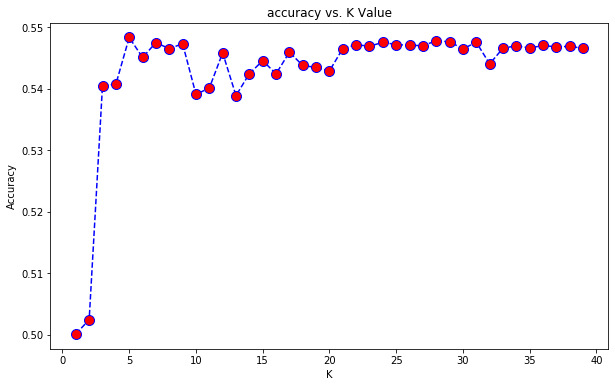

In [16]:
# Maximum Accuracy
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    Kyhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, Kyhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc),"at K =",acc.index(max(acc))+1)
print(Kyhat)

### Decision Tree

In [17]:
# Building the Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

df_tree =  DecisionTreeClassifier(criterion = "entropy", max_depth = 16)
df_tree
df_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=16, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
# Train Model & Predict
DTyhat = df_tree.predict(X_test)
print(DTyhat)
print(X_test)

[2 2 2 ... 2 1 2]
[[-0.67567888 -0.66964064  0.42656848]
 [-0.67567888  1.531829    0.42656848]
 [-0.67567888 -0.66964064  0.42656848]
 ...
 [ 1.14675237  1.531829    0.42656848]
 [ 2.60469736  1.25664529  2.07280738]
 [-0.67567888 -0.66964064  0.42656848]]


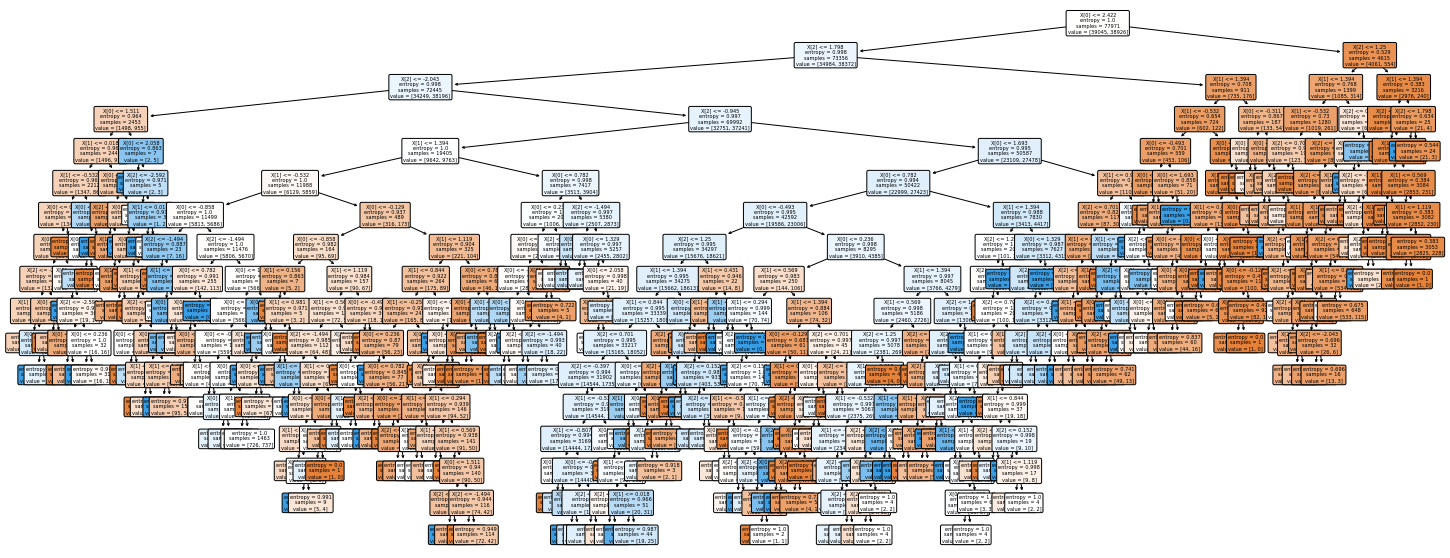

In [19]:
plt.figure(figsize=(25,10))
out = plot_tree(df_tree,filled=True,rounded=True,fontsize=5)

### Logistic Regression

In [20]:
# Building LR Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=6, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=6, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
# Train Model & Predict
LRyhat = LR.predict(X_test)
LRyhat

array([2, 2, 2, ..., 1, 1, 2])

In [22]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.47172552, 0.52827448],
       [0.36388099, 0.63611901],
       [0.47172552, 0.52827448],
       ...,
       [0.53582723, 0.46417277],
       [0.68581436, 0.31418564],
       [0.47172552, 0.52827448]])

### Chack Accuracy of Models

In [23]:
from sklearn.metrics import jaccard_score,f1_score

#### K-Nearest Neighbor

In [24]:
# Jaccard Similarity Score
jaccard_score(y_test,Kyhat)

0.348655421326252

In [25]:
# F1-score
f1_score(y_test,Kyhat, average='macro')

0.5448450196284904

#### Decision Tree

In [26]:
# Jaccard Similarity Score
jaccard_score(y_test,DTyhat)

0.2675752912728072

In [27]:
# F1-score
f1_score(y_test,DTyhat, average='macro')

0.5374850239652665

#### Logistic Regression

In [28]:
# Jaccard Similarity Score
jaccard_score(y_test,LRyhat)

0.27907348881865823

In [29]:
# F1-score
f1_score(y_test,LRyhat, average='macro')

0.5172228331543939